In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS8rPime-jnxtoGJ3Pay9KxuL6_-Yvixmanx0uKsug2rkYg_4m7Ntk7fuKAl9iQMGu0lAdmF9sAkXmv/pub?output=csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

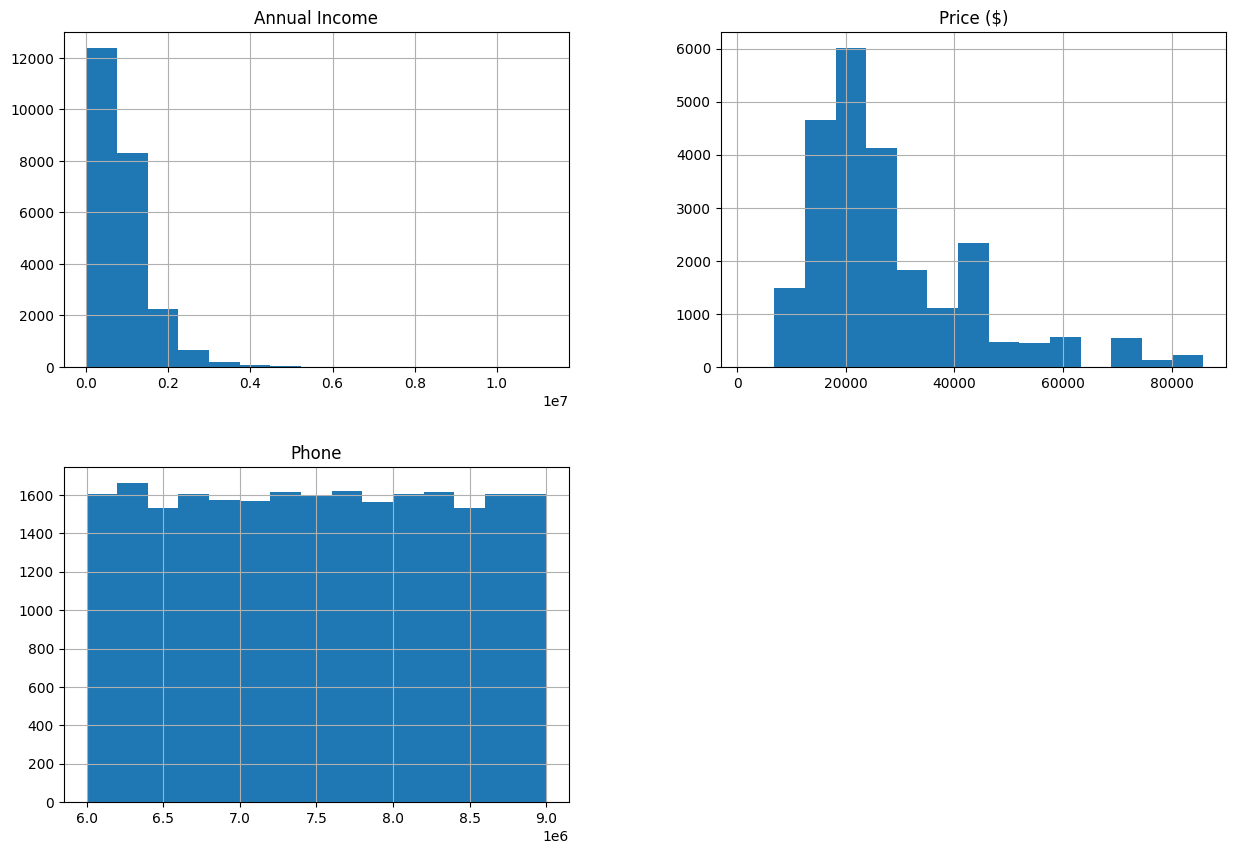

In [ ]:
df.hist(bins=15, figsize=(15,10))
plt.show()

In [ ]:
(df['Company'].value_counts())

Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: Company, dtype: int64

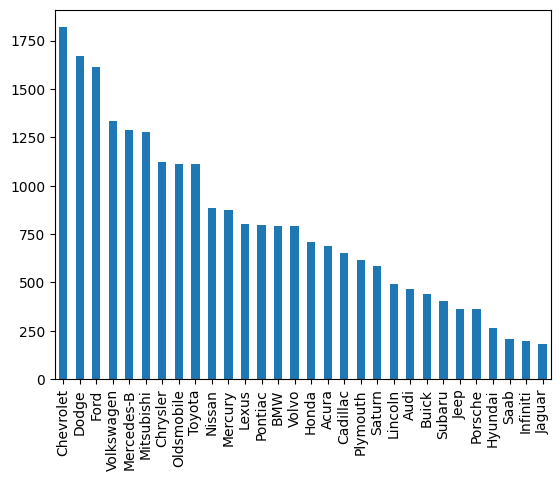

In [ ]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

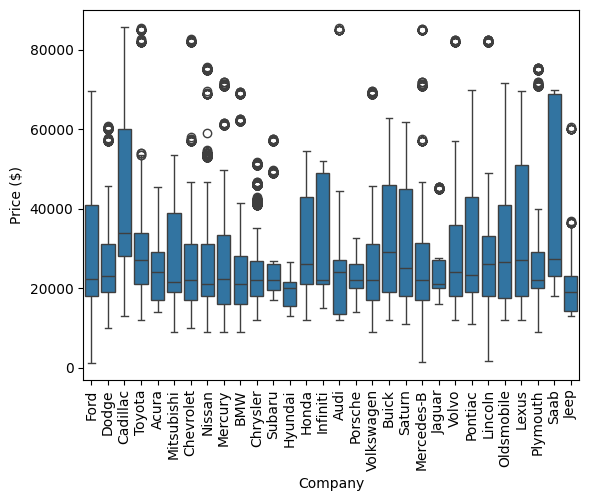

In [ ]:
sns.boxplot(x='Company', y='Price ($)', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

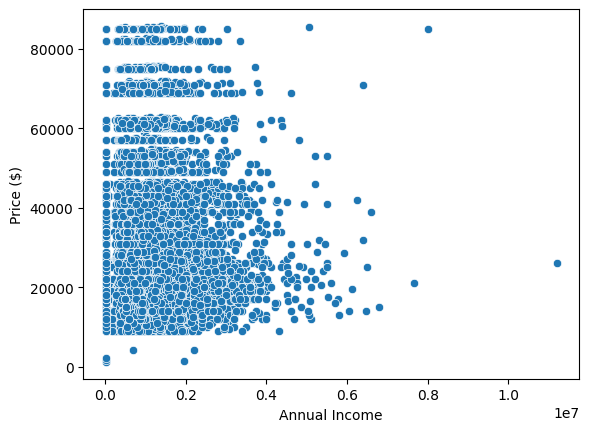

In [ ]:
sns.scatterplot(x='Annual Income', y='Price ($)', data=df)

<ipython-input-36-b533ebab2cf1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


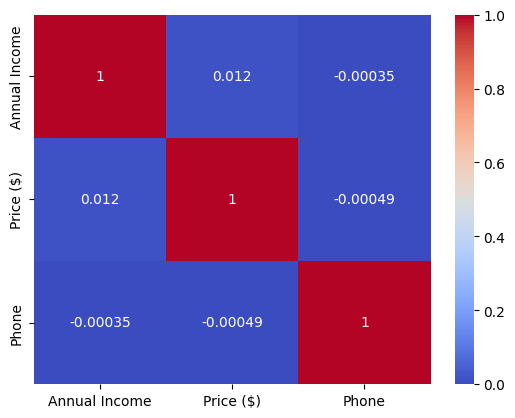

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Data Cleaning

In [ ]:
# Convert 'Date' to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Convert 'Phone' to a string data type
df['Phone'] = df['Phone'].astype(str)

In [ ]:
df.describe()

,Annual Income,Price ($)
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000


# Understanding Outliers

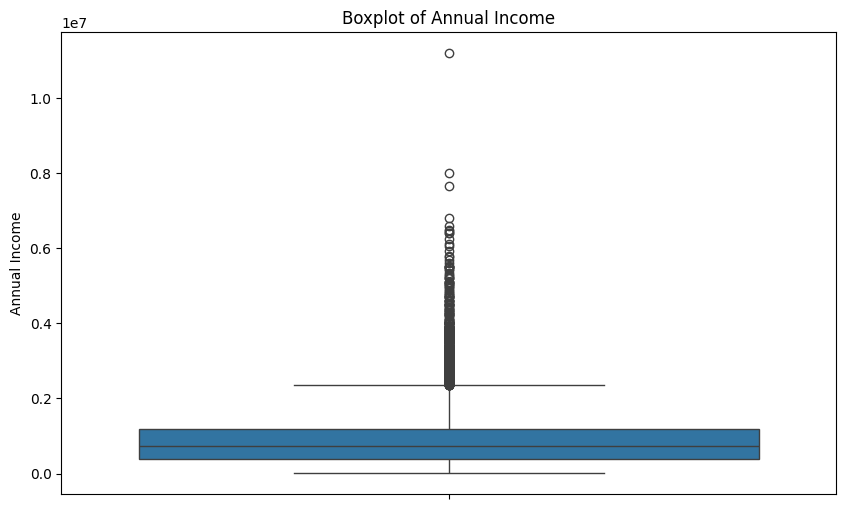

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Annual Income'])
plt.title('Boxplot of Annual Income')
plt.show()

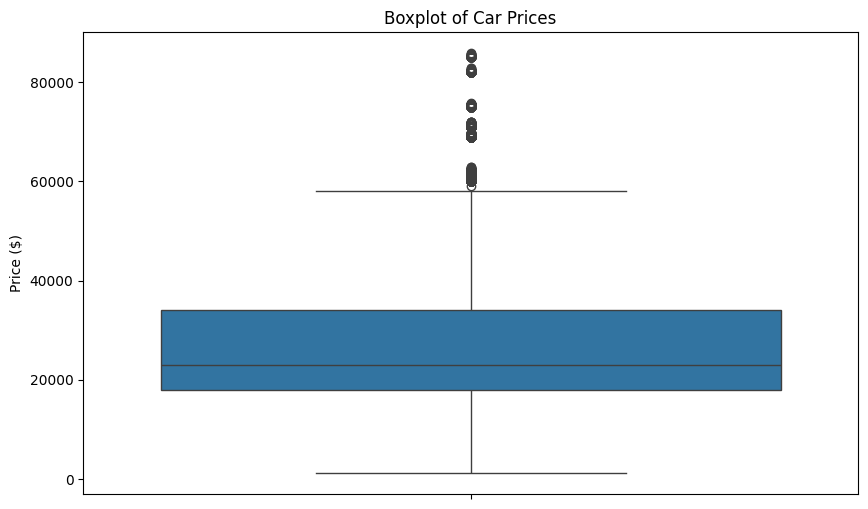

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Price ($)'])
plt.title('Boxplot of Car Prices')
plt.show()

# Seasonal Trend

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

<ipython-input-8-638cfd7d8f55>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sales_pivot = monthly_sales.pivot("Month", "Year", "Sales Count")


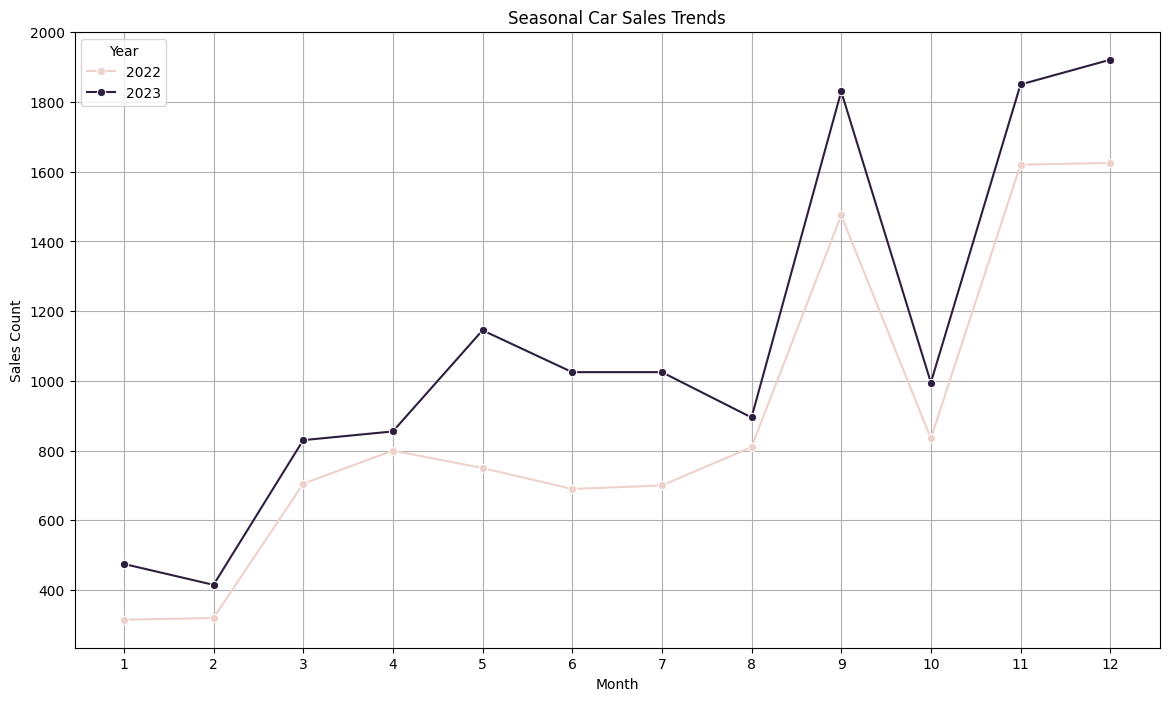

In [ ]:
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Sales Count')

# Pivot the data to get years as columns and months as rows
sales_pivot = monthly_sales.pivot("Month", "Year", "Sales Count")

# Plot the sales trend over months for each year
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='Sales Count', hue='Year', marker='o')

plt.title('Seasonal Car Sales Trends')
plt.xticks(range(1, 13))  # Set x-ticks to be the months
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

# Correlation Analysis


In [ ]:
df.corr()

<ipython-input-41-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Annual Income,Price ($),Year,Month
Annual Income,1.000000,0.012065,-0.031406,-0.015141
Price ($),0.012065,1.000000,-0.007511,0.006856
Year,-0.031406,-0.007511,1.000000,-0.023009
Month,-0.015141,0.006856,-0.023009,1.000000


#### Between Annual Income and Car Price

In [ ]:
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, np.inf]
income_labels = ['<50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-350k', '>350k']
df['Income Range'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)


In [ ]:
correlation = df['Price ($)'].corr(df['Annual Income'])
print(correlation)

0.012064959420296485


Text(0.5, 1.0, 'Scatterplot of Car Price vs Annual Income of Buyer')

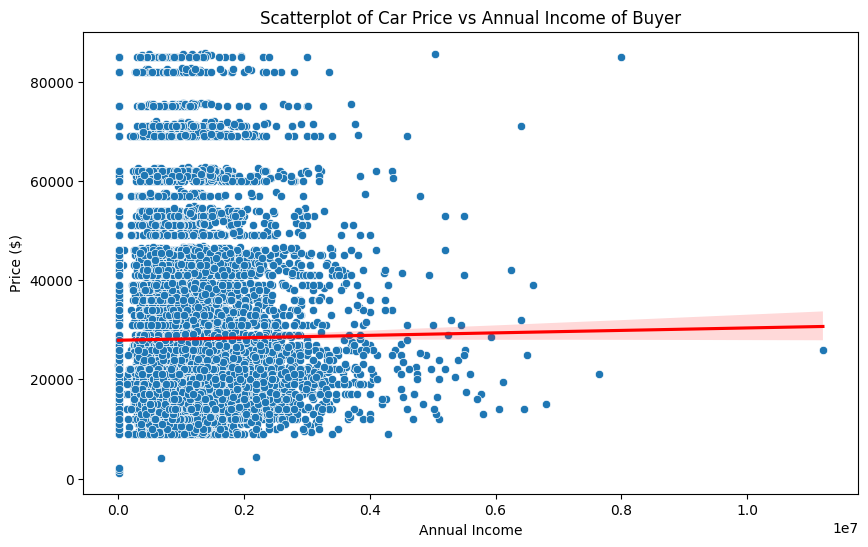

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df)

# Optionally, add a regression line to the scatterplot
sns.regplot(x='Annual Income', y='Price ($)', data=df, scatter=False, color='red')

plt.title('Scatterplot of Car Price vs Annual Income of Buyer')

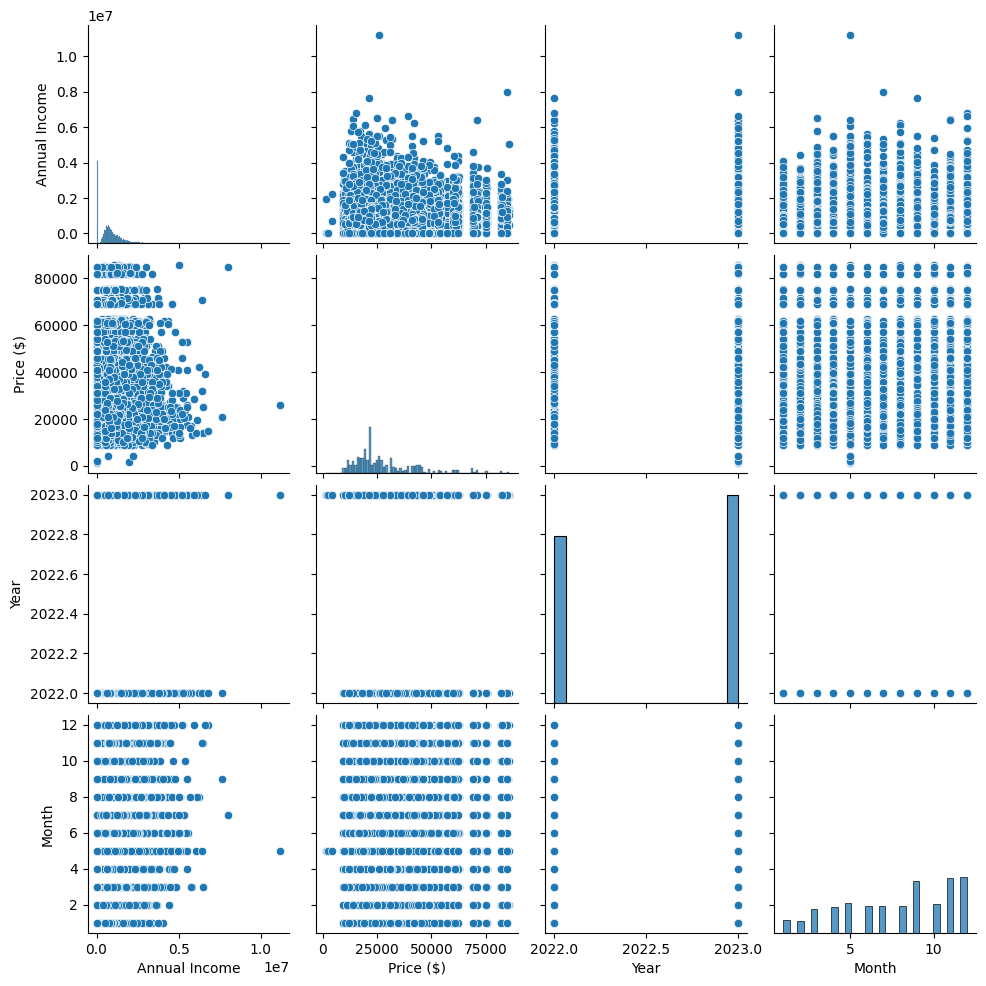

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr(method='pearson')

<ipython-input-25-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Annual Income,Price ($),Dealer_Region_Freq
Annual Income,1.000000,0.012065,-0.007501
Price ($),0.012065,1.000000,0.001617
Dealer_Region_Freq,-0.007501,0.001617,1.000000


In [ ]:
df.corr(method = 'spearman')

<ipython-input-24-6ff71a1c8ea1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')


,Annual Income,Price ($),Dealer_Region_Freq
Annual Income,1.000000,0.016723,-0.006931
Price ($),0.016723,1.000000,0.004833
Dealer_Region_Freq,-0.006931,0.004833,1.000000


In [ ]:
df.corr(method = 'kendall')

<ipython-input-46-e65780310510>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'kendall')


,Annual Income,Price ($),Year,Month
Annual Income,1.000000,0.011444,-0.028500,-0.005455
Price ($),0.011444,1.000000,-0.004981,0.003935
Year,-0.028500,-0.004981,1.000000,-0.019919
Month,-0.005455,0.003935,-0.019919,1.000000


<ipython-input-27-8ead0a7a4eae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm')


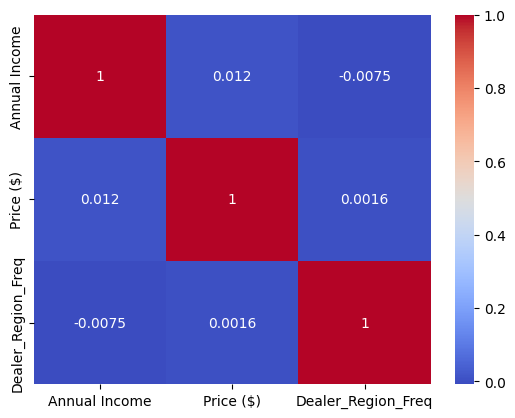

In [ ]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Adding Dealer_Region_Freq
region_freq = df['Dealer_Region'].value_counts().to_dict()
df['Dealer_Region_Freq'] = df['Dealer_Region'].map(region_freq)
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,Income Range,Dealer_Region_Freq
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,1,<50k,3128
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1,>350k,3130
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1,>350k,3128
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,1,<50k,3131
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1,>350k,3821


In [ ]:
df.describe()

,Annual Income,Price ($),Dealer_Region_Freq
count,2.390600e+04,23906.000000,23906.000000
mean,8.308403e+05,28090.247846,3457.399147
std,7.200064e+05,14788.687608,396.260906
min,1.008000e+04,1200.000000,3128.000000
25%,3.860000e+05,18001.000000,3128.000000
50%,7.350000e+05,23000.000000,3131.000000
75%,1.175750e+06,34000.000000,3821.000000
max,1.120000e+07,85800.000000,4135.000000


In [ ]:
columns_of_interest = ['Annual Income', 'Price ($)', 'Dealer_Region_Freq']

# Compute the correlation matrix for the selected columns
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Annual Income,Price ($),Dealer_Region_Freq
Annual Income,1.000000,0.012065,-0.007501
Price ($),0.012065,1.000000,0.001617
Dealer_Region_Freq,-0.007501,0.001617,1.000000


<Axes: >

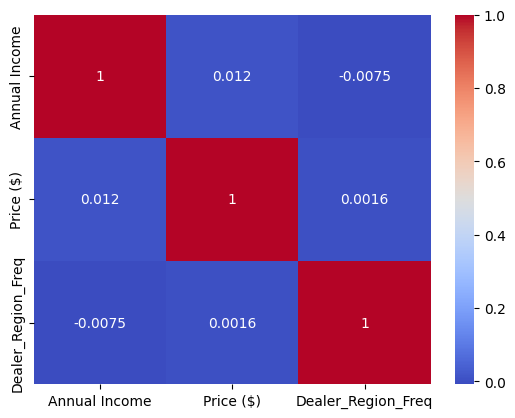

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Chi-Square Analysis

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contingency_table = pd.crosstab(df['Transmission'], df['Body Style'])

In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
stat

166.96860915403673

In [ ]:
p

4.6773862027997415e-35

In [ ]:
dof

4

In [ ]:
expected

array([[1562.30406592, 3222.41646449, 2074.48318414, 3351.77587217,
        2360.02041329],
       [1408.69593408, 2905.58353551, 1870.51681586, 3022.22412783,
        2127.97958671]])

In [ ]:
contingency_table

Body Style,Hardtop,Hatchback,Passenger,SUV,Sedan
Transmission,,,,,
Auto,1408,3458,2020,3086,2599
Manual,1563,2670,1925,3288,1889


# Linear Regression

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Make sure your date column is in datetime format
# Extract year and month from the date

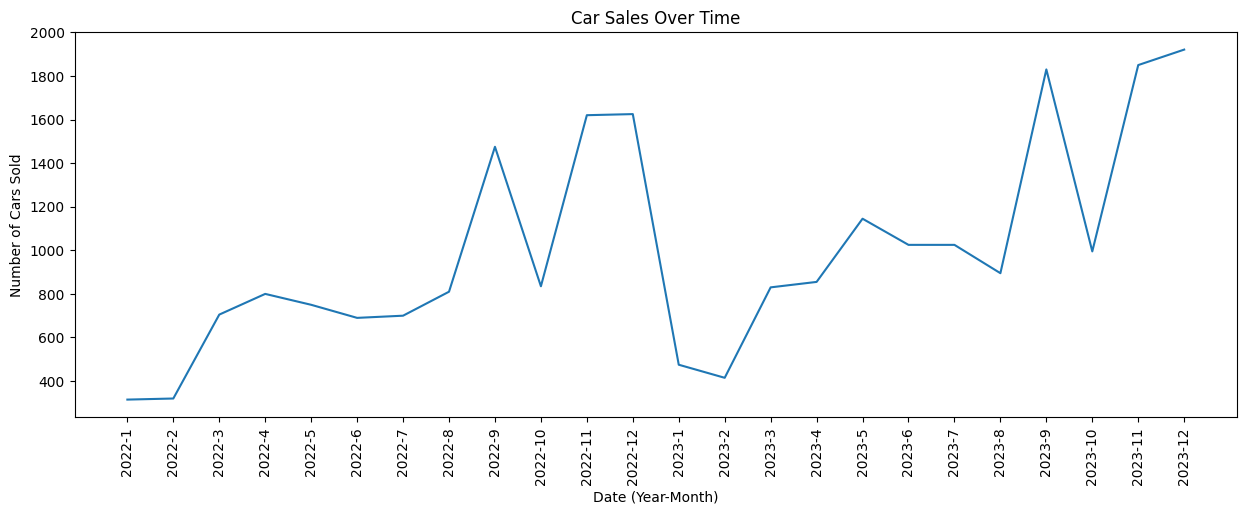

In [ ]:
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Sales')

plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'])
plt.xticks(rotation=90)
plt.title('Car Sales Over Time')
plt.ylabel('Number of Cars Sold')
plt.xlabel('Date (Year-Month)')
plt.show()

# Aggregate data to get the total number of sales per month and year
# Plot the aggregated sales data to visualize trends

In [ ]:
df['Count'] = 1
sales_data = df.groupby(['Year', 'Month'])['Count'].sum().reset_index()

# Assuming 'Date' has already been converted to datetime and 'Year' and 'Month' have been extracted
# Add a helper column to count sales

In [ ]:
# Dependent Variable
Y = sales_data['Count']

# Independent Variable
X = pd.get_dummies(sales_data['Month'], drop_first=True)
X['Year'] = sales_data['Year']

# We need to convert 'Month' to dummy variables because it's categorical
# Avoiding the dummy variable trap
# Adding 'Year' as a numeric predictor

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
model = LinearRegression().fit(X, Y)

In [ ]:
model.coef_

array([ -27.5,  372.5,  432.5,  552.5,  462.5,  467.5,  457.5, 1257.5,
        520. , 1340. , 1378. ,  218. ])

In [ ]:
model.intercept_

-440510.0000000001

In [ ]:
model

LinearRegression()

In [ ]:
predictions = model.predict(X)

In [ ]:
sales_data['Predicted_Sales'] = predictions

In [ ]:
monthly_sales.head()

,Year,Month,Count
0,2022,1,315
1,2022,2,320
2,2022,3,705
3,2022,4,800
4,2022,5,750


In [ ]:
sales_data

,Year,Month,Count,Predicted_Sales
0,2022,1,315,286.0
1,2022,2,320,258.5
2,2022,3,705,658.5
3,2022,4,800,718.5
4,2022,5,750,838.5
5,2022,6,690,748.5
6,2022,7,700,753.5
7,2022,8,810,743.5
8,2022,9,1475,1543.5
9,2022,10,835,806.0


In [ ]:
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))

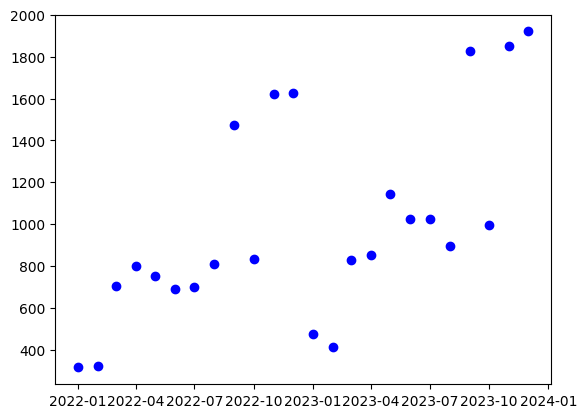

In [ ]:
plt.scatter(monthly_sales['Date'], monthly_sales['Sales'], color='blue', label='Actual Sales')

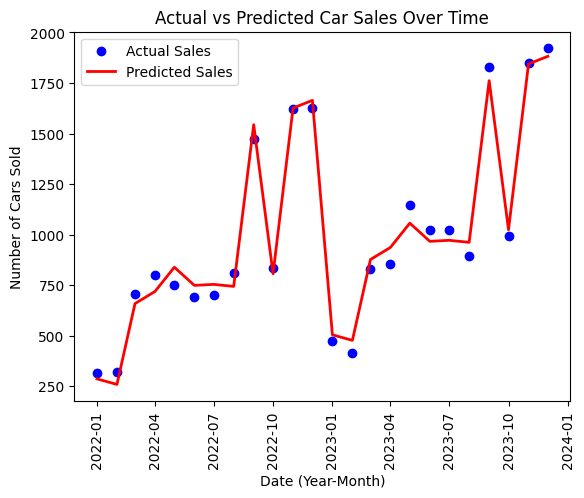

In [ ]:
plt.scatter(monthly_sales['Date'], monthly_sales['Sales'], color='blue', label='Actual Sales')
plt.plot(monthly_sales['Date'], sales_data['Predicted_Sales'], color='red', linestyle='-', linewidth=2, label='Predicted Sales')
plt.xticks(rotation=90)
plt.title('Actual vs Predicted Car Sales Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Cars Sold')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
Y_pred = model.predict(X)

In [ ]:
# Calculate the Mean Absolute Error between actual and predicted sales
mean_absolute_error(Y, Y_pred)

52.333333333333336

In [ ]:
mean_absolute_percentage_error(Y, Y_pred)*100

6.8076857438812715